In [1]:
import numpy as np
import matplotlib.pyplot as plt

from QFpy.vanilla_option_utils import EuropeanCallDelta, EuropeanCallGamma, EuropeanCallValue, EuropeanPutDelta, EuropeanPutGamma, EuropeanPutValue
from QFpy.black_scholes import EuropeanExercise, AmericanExercise, BermudanExercise, BlackScholesFDSolver

# Set the default font family and size
plt.rcParams['font.family'] = 'serif'  # Example: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = ['Computer Modern']  # Specify the font family if using 'serif'
plt.rcParams['font.size'] = 14  # Set the font size
plt.rcParams['xtick.labelsize'] = 14  # Replace 14 with the desired font size

In [2]:
# Set up a european call option by defining the payoff 

payoff = lambda S, K, r: np.maximum(S-K, 0)

boundary = lambda S, t, K, r: S - K * np.exp(-r*(T-t))

# Define parameters of the problem 

# Asset price
S = 100 

# Option starts on the money 
K = 100 

# Expiry
T = 100

# Daily vol
vol = 0.01 

# Daily risk-free return rate
r = 0.05 / 365 

# Underlying price range for BS grid 
S_range = np.array([1e-05, 200])

# Time grid
T_range = np.array([0,100])

# Initialize solver with European exercise

solver = BlackScholesFDSolver(vol,r,payoff,boundary,S_range,T_range, exercise=EuropeanExercise(), args=[K,r])


In [3]:

american_solver = BlackScholesFDSolver(vol,r,payoff,boundary,S_range,T_range, exercise=AmericanExercise(), args=[K,r])


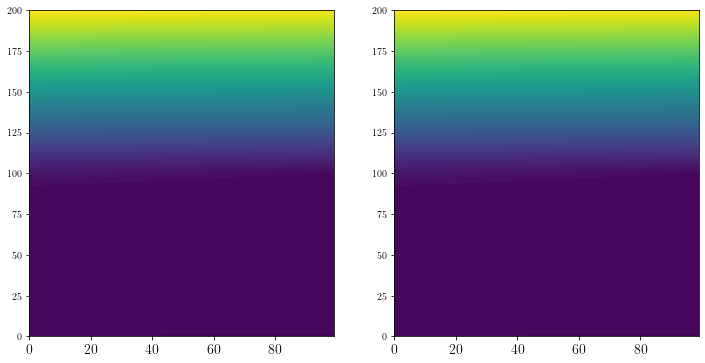

In [5]:
s = np.linspace(0,200,100)
t = np.arange(100)

s_g, t_g = np.meshgrid(s,t)
Va = american_solver.get_value(t_g,s_g)
Ve = solver.get_value(t_g,s_g)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.contourf(t_g,s_g, Va, levels=100)
ax2.contourf(t_g,s_g, Ve, levels=100)